> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Numbers of people who showed and not showed up for appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Dataset for medical appointments no-shows contains the following:
No duplicates,
No missing values,
110527 rows and 14 columns

Data Dictionary
01 - PatientId
Identification of a patient
02 - AppointmentID
Identification of each appointment
03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
04 - DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor.
05 - DataAgendamento
The day someone called or registered the appointment, this is before appointment of course.
06 - Age
How old is the patient.
07 - Neighbourhood
Where the appointment takes place.
08 - Scholarship
True of False . 
09 - Hipertension
True or False
10 - Diabetes
True or False
Alcoholism
True or False
Handcap
True or False
SMS_received
1 or more messages sent to the patient.
No-show
True or False.
Inspiration
What if that possible to predict someone to no-show an appointment? 


### Question(s) for Analysis
Research questions:
1. Is there a relationship between the number of people who received SMSs and the number of people who show up for appointments?
2. Which age attended the most appointments?
3. What is the median age of people who were booked for appointment?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data


df_noshow = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#   types and look for instances of missing or possibly errant data.
# Checking columns, rows, missing values of census data


df_noshow.describe()




,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#Minimum age of negative value should be dropped

In [5]:
df_noshow.drop(df_noshow[df_noshow['Age'] < 0].index, inplace = True)

In [6]:
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [9]:
df_noshow.shape

(110526, 14)

The data set has 110526 rows and 14 columns


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [10]:
# function for making column lower cases  
def columns_to_lower(df):
    df.columns=df.columns.str.lower()
    return df 

In [11]:
# making column case smaller for easy reference on the code

df_noshow = columns_to_lower(df_noshow)
df_noshow.columns
df_noshow.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [13]:
# finding duplicates, count and droping them. There are no duplicates, therefore nothing was dropped.

df_noshow.duplicated().sum()

0

There are no duplicates.

In [14]:
#finding missing values.

df_noshow.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no-show           0
dtype: int64

There are no missing values.

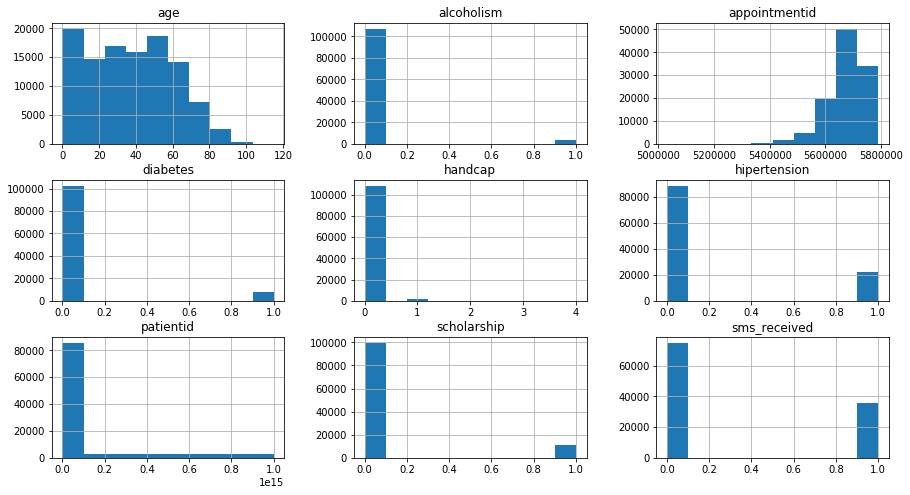

In [15]:
# Creating visuals

df_noshow.hist(figsize= (15,8));


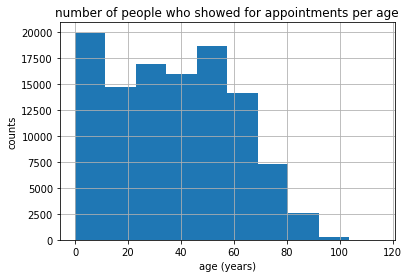

In [16]:


df_noshow['age'].hist()
plt.xlabel('age (years)')
plt.ylabel('counts')
plt.title('number of people who showed for appointments per age')
plt.grid(True)
plt.show()



In [17]:
df_noshow.groupby(['age'])['gender'].count()

age
0      3539
1      2273
2      1618
3      1513
4      1299
5      1489
6      1521
7      1427
8      1424
9      1372
10     1274
11     1195
12     1092
13     1103
14     1118
15     1211
16     1402
17     1509
18     1487
19     1545
20     1437
21     1452
22     1376
23     1349
24     1242
25     1332
26     1283
27     1377
28     1448
29     1403
       ... 
73      725
74      602
75      544
76      571
77      527
78      541
79      390
80      511
81      434
82      392
83      280
84      311
85      275
86      260
87      184
88      126
89      173
90      109
91       66
92       86
93       53
94       33
95       24
96       17
97       11
98        6
99        1
100       4
102       2
115       5
Name: gender, Length: 103, dtype: int64

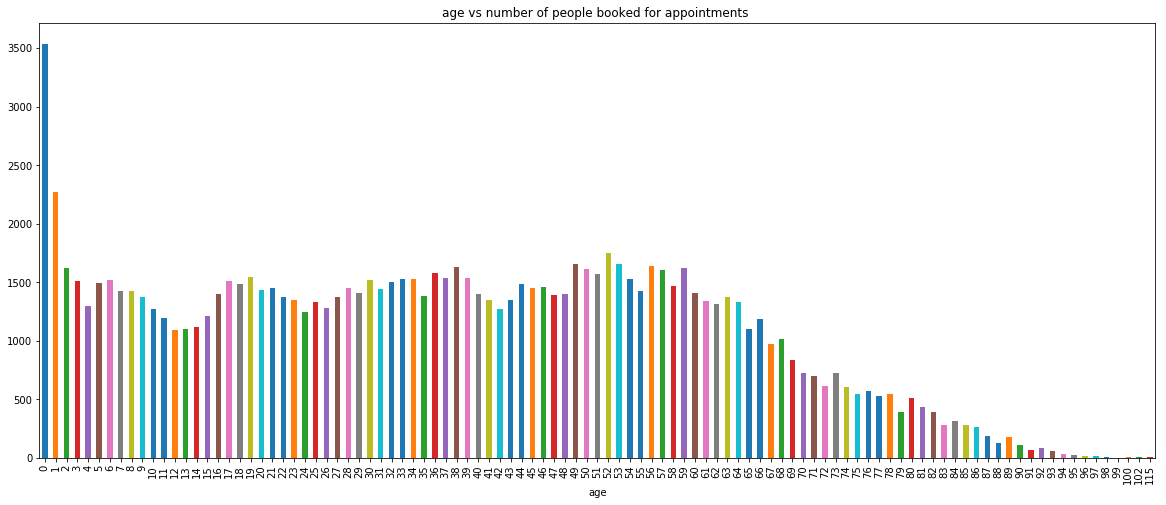

In [18]:
df_noshow.groupby(['age'])['gender'].count().plot(kind='bar', figsize= (20,8))

plt.title('age vs number of people booked for appointments ')

plt.show()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Is there a relationship between the number of people who received SMSs and the number of people who show up for appointments?
)

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# print the column labels in the dataframe
for i, v in enumerate(df_noshow.columns):
    print(i, v)


0 patientid
1 appointmentid
2 gender
3 scheduledday
4 appointmentday
5 age
6 neighbourhood
7 scholarship
8 hipertension
9 diabetes
10 alcoholism
11 handcap
12 sms_received
13 no-show


In [20]:
# Is there a relationship between the number of people who received SMSs and the number of people who show up for appointments?

df_noshow.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
df_noshow.groupby(["sms_received", "no-show"])["gender"].count()

sms_received  no-show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: gender, dtype: int64

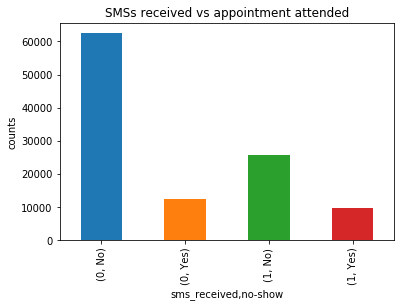

In [22]:
df_noshow.groupby(["sms_received", "no-show"])["gender"].count().plot(kind='bar')

plt.ylabel('counts')
plt.title('SMSs received vs appointment attended')

plt.show()

The number of people who went for appointments were higher than those who did not go, for both groups who received SMSs and not received SMSs. There is no relationship between the number of people who received SMSs and the attendence of appointment.

### Research Question 2  (Which age attended the most appointments?)

In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [24]:
# Which age attended the most appointments?

In [25]:
df_noshow[df_noshow['no-show']=='No']['age'].value_counts().max()

2900

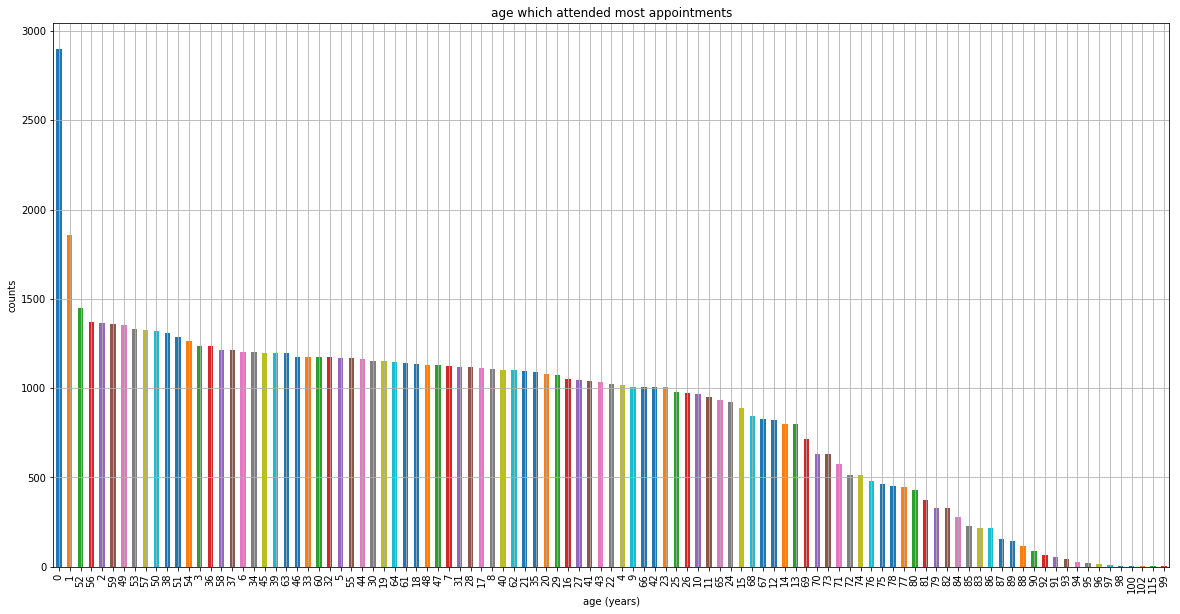

In [26]:
df_noshow[df_noshow['no-show']=='No']['age'].value_counts().plot(kind='bar', figsize=(20,10))

plt.xlabel('age (years)')
plt.ylabel('counts')
plt.title('age which attended most appointments')
plt.grid(True)
plt.show()

People at the age of zero are the ones who attended most of the appointments.

Research Question 3 (What is the median age of people who were booked for appointment?)

In [27]:
# What is the median age of people who were booked for appointment?

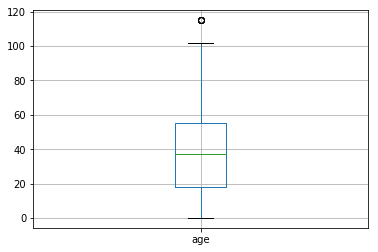

In [28]:
boxplot = df_noshow.boxplot(column=["age"])

In [29]:
df_noshow["age"].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

The median age of people who were booked for appointments was 37.00.

<a id='conclusions'></a>
## Conclusions

The number of people who went for appointments were higher than those who did not go, for both groups who received SMSs and not received SMSs. There is no relationship between the number of people who received SMSs and the attendence of appointment.
People at the age of zero are the ones who attended most of the appointments.
The median age of people who were booked for appointments was 37.00. 

The number of peopple who received SMSs and those who did not receive were not equal.
Most colums had categorical data which did not allow for scatter plots which could have helped to see how change in certain feature affects others.

Columns with categorical data posed a limitation by hiddering creation of scatter plots which could have helped to see how changes in certain features affects other features.

Additional research can be done to see how combination of multiple factors affect the number of appointments.



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0